<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [ ]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

In [ ]:
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [91]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



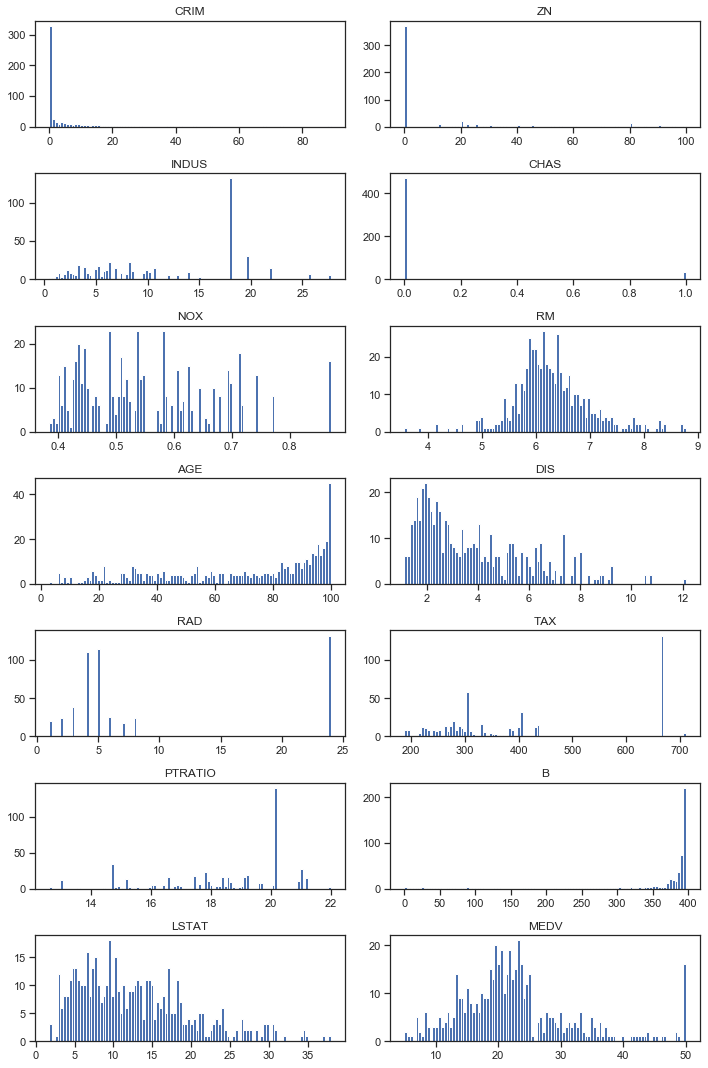

In [93]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 15))
ax = axes.flatten()
for n, axis in enumerate(ax):
    ax[n].hist(data.iloc[:,n], bins=100)
    ax[n].set_title(data.iloc[:,n].name)
plt.tight_layout()

Нормальное     - RM
Равномерное    - не нашел
Биноминальное  - RAD
Бернулли       - CHAS
Геометрическое - AGE
Логнормальное  - DIS

Экспонециальное? - CRIM

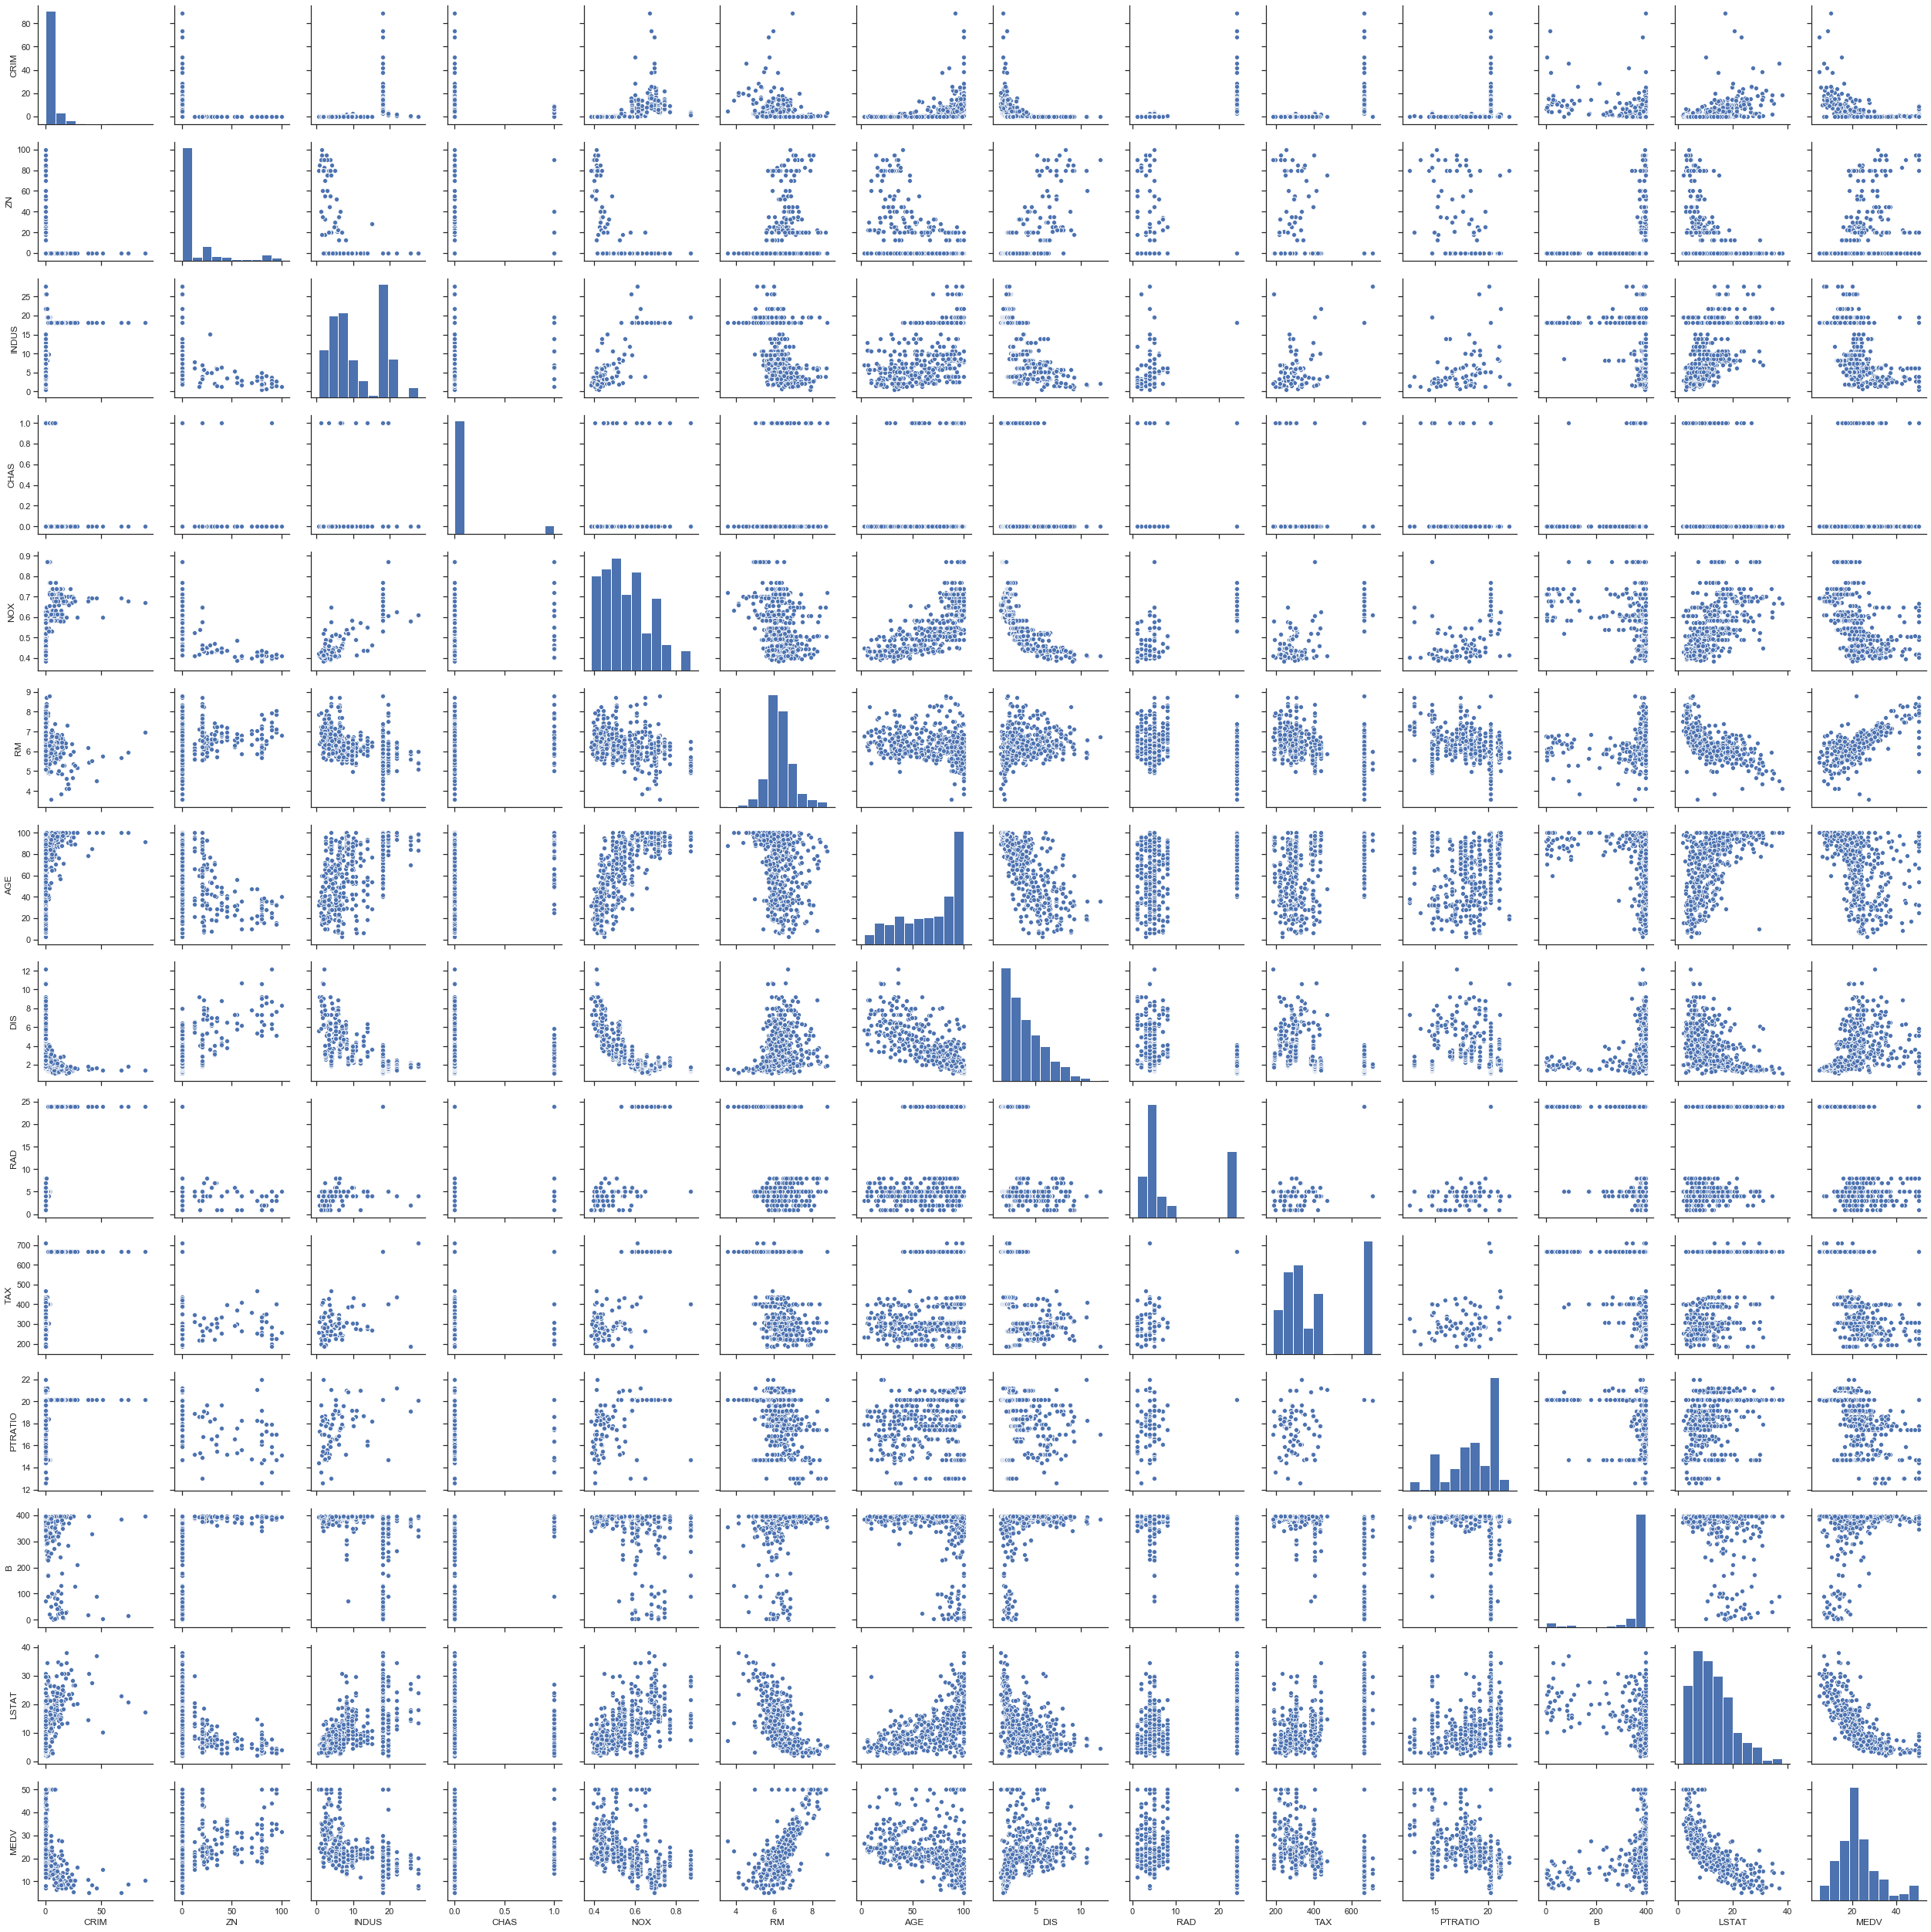

In [5]:
sns.set(style="ticks")
g = sns.pairplot(data)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

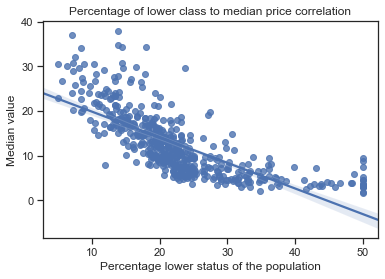

In [94]:
medv = data["MEDV"]
lstat = data["LSTAT"]
sns.regplot(x=medv, y=lstat, data=data, fit_reg=True)
plt.xlabel("Percentage lower status of the population")
plt.ylabel("Median value")
plt.title("Percentage of lower class to median price correlation")
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

1.   Разделить данные на 80% тренировочных, 20% тестовых

In [96]:
medv.fillna(0, inplace = True)
lstat.fillna(0, inplace = True)
medv_n = np.array(medv).reshape(-1,1)
lstat_n = np.array(lstat).reshape(-1,1)


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(medv_n, lstat_n, test_size = 0.2, random_state = 3)

2.   Составить модель линейной регрессии

In [98]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3.   Посчитать ошибку модели на тестовых данных

In [99]:
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.5663680841829949

4.   Сделать точечный график данных и полученной прямой линейной регрессии

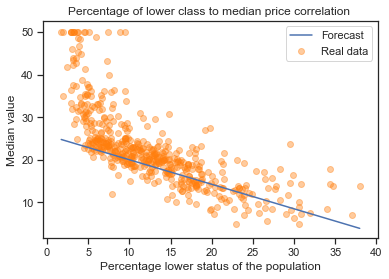

In [100]:
lstat_min = min(lstat)
lstat_max = max(lstat)

x = np.linspace(lstat_min, lstat_max, 100)
y = model.coef_ * x + model.intercept_
plt.plot(x,y.T, label="Forecast")
plt.scatter(lstat, medv, c='#ff7f0e', alpha=0.4, label="Real data")

plt.xlabel("Percentage lower status of the population")
plt.ylabel("Median value")
plt.title("Percentage of lower class to median price correlation ")
plt.legend()


Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [111]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0          Finland       1             4             41.0             10.0   
1          Denmark       2            13             24.0             26.0   
2           Norway       3             8             16.0             29.0   
3          Iceland       4             9              3.0              3.0   
4      Netherlands       5             1             12.0             25.0   

   Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0             2.0      5.0         4.0        47.0                    22.0   
1             4.0      6.0         3.0        22.0                    14.0   
2             3.0      3.0         8.0        11.0                     7.0   
3             1.0      7.0        45.0         3.0                    15.0   
4            15.0     19.0        12.0         7.0                    12.0   

   Healthy life\nexpectancy  
0                      27.0  
1                      23.0  
2                      12.0  
3                      13.0  
4                      18.0

In [112]:
cov = np.round(data.iloc[:,1:].cov(),2)
cov.head()

Ladder  SD of Ladder  Positive affect  Negative affect  \
Ladder           2041.00       1100.84           995.93          1061.21   
SD of Ladder     1100.84       2041.00           173.69          1259.81   
Positive affect   995.93        173.69          2015.00           785.24   
Negative affect  1061.21       1259.81           785.24          2015.00   
Social support   1657.43       1219.52           778.33          1253.10   

                 Social support  Freedom  Corruption  Generosity  \
Ladder                  1657.43  1108.09      370.87     1008.95   
SD of Ladder            1219.52   512.36      506.90      797.78   
Positive affect          778.33  1373.77      405.29      715.08   
Negative affect         1253.10   866.94      309.23      681.53   
Social support          2015.00   904.54      230.74      891.50   

                 Log of GDP\nper capita  Healthy life\nexpectancy  
Ladder                          1615.00                   1613.37  
SD of Ladder                    1254.53                   1208.03  
Positive affect                  586.12                    647.91  
Negative affect                 1050.93                    944.80  
Social support                  1509.29                   1471.92

In [113]:
# from sklearn.preprocessing import MinMaxScaler

# Нормализация
# scaler = MinMaxScaler() 
# scaled_values = scaler.fit_transform(data.iloc[:,1:]) 
# data.iloc[:,1:] = scaled_values

# Корреляция
# data.corr()

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [129]:
# Пустых значений нет.
data[data["Country (region)"].isnull()]

Empty DataFrame
Columns: [Country (region), Ladder, SD of Ladder, Positive affect, Negative affect, Social support, Freedom, Corruption, Generosity, Log of GDP
per capita, Healthy life
expectancy, Continent]
Index: []

Сколько стран в выборке? Написать ответ. 

In [130]:
total_countries = len(data.iloc[:,0].unique())
print(f"В сете - {total_countries} стран.")

В сете - 156 стран.


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [115]:
continents = pd.read_csv("continents.csv", sep=";")
continents.head()

Country Continent
0  Mauritius    Africa
1      Libya    Africa
2    Nigeria    Africa
3    Algeria    Africa
4    Morocco    Africa

In [116]:
data = data.merge(right=continents, left_on="Country (region)", right_on="Country", how="left").drop('Country', axis=1)

Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

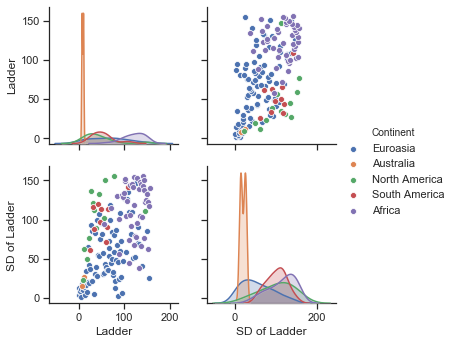

In [19]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, vars=["Ladder","SD of Ladder"], hue='Continent')
plt.show()

C:\Users\Gorelov\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


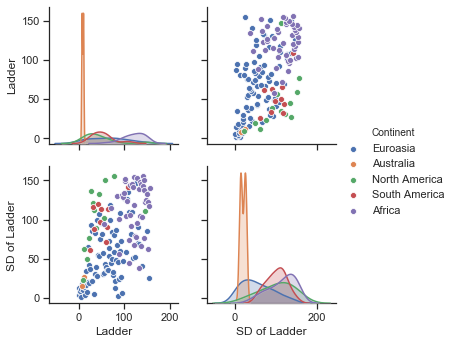

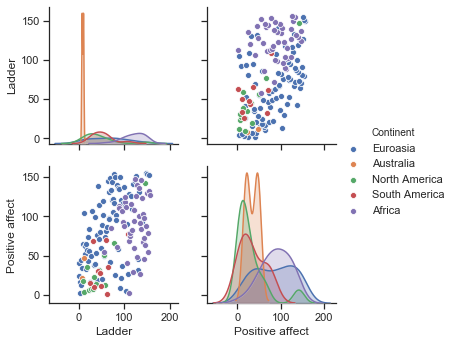

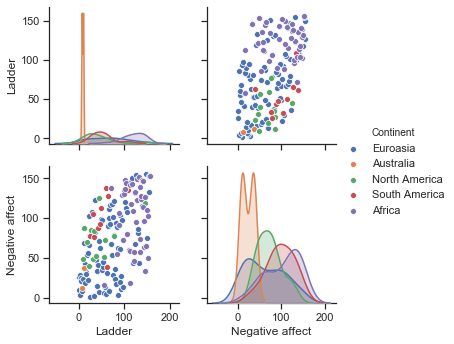

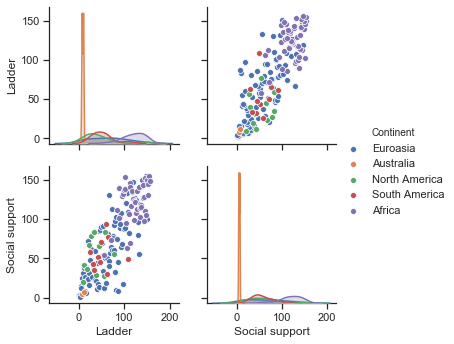

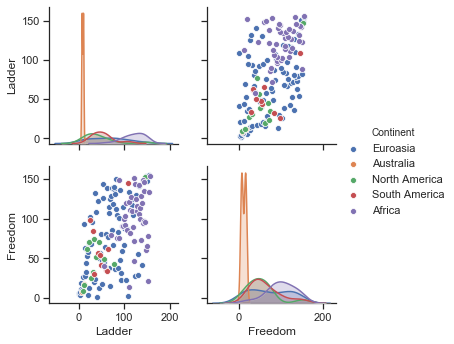

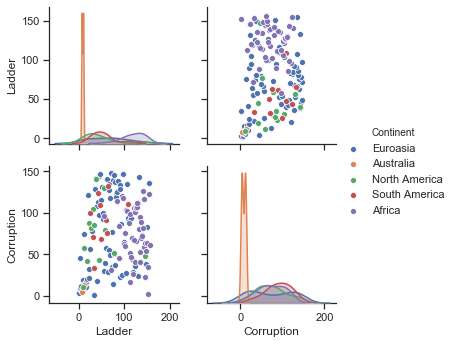

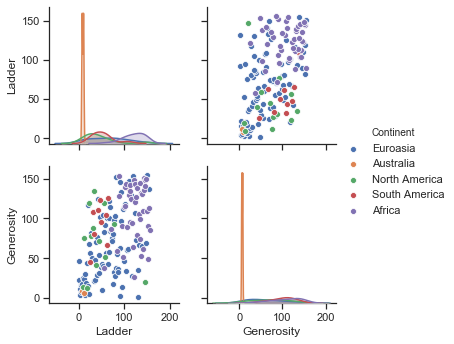

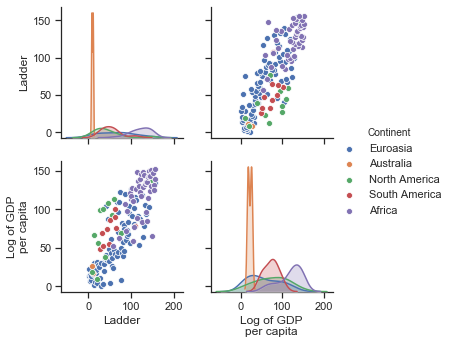

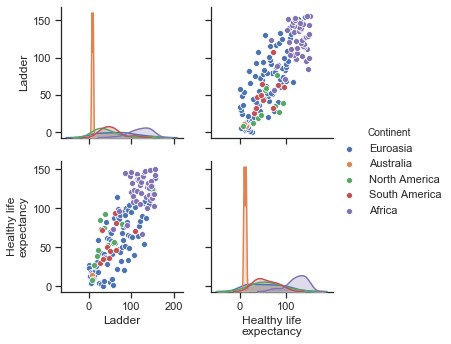

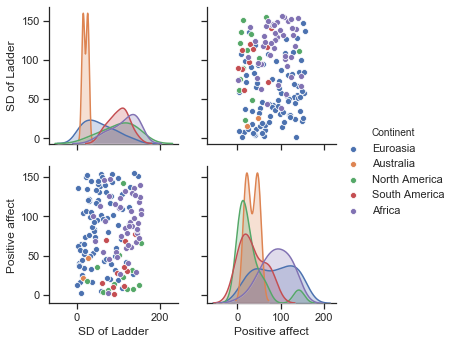

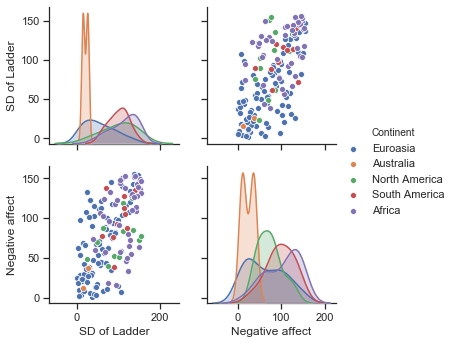

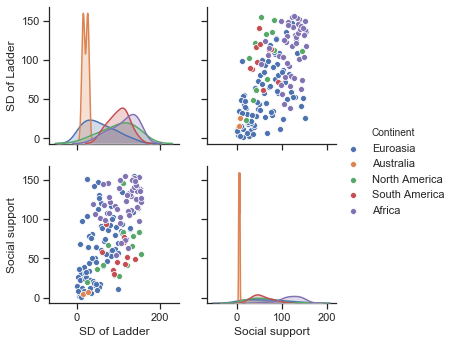

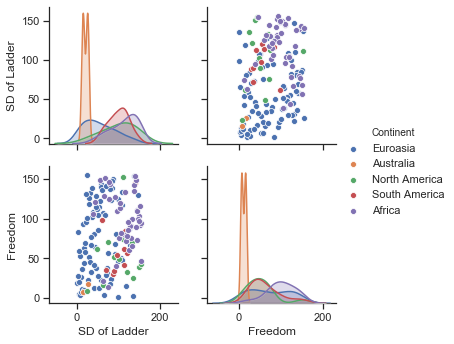

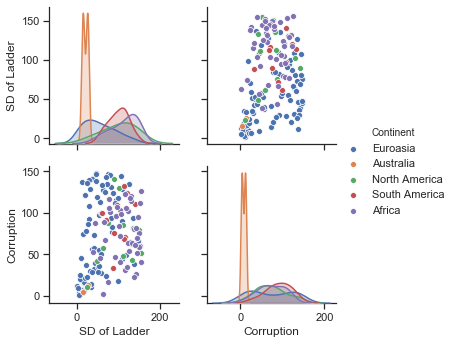

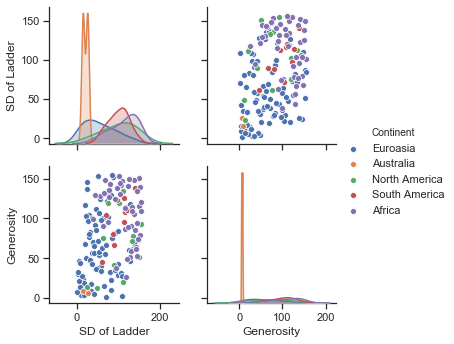

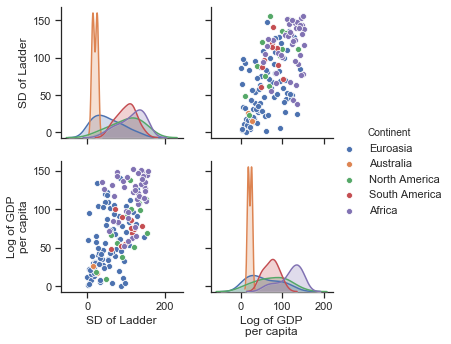

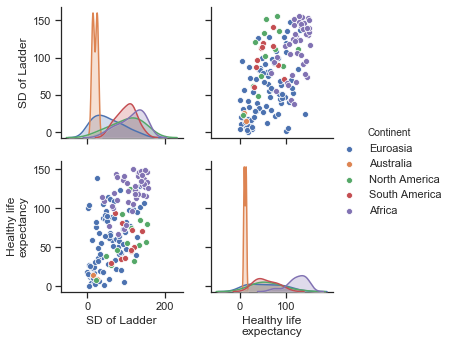

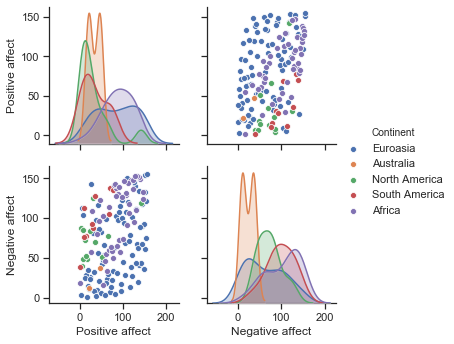

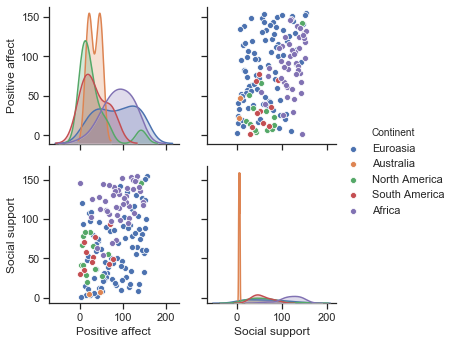

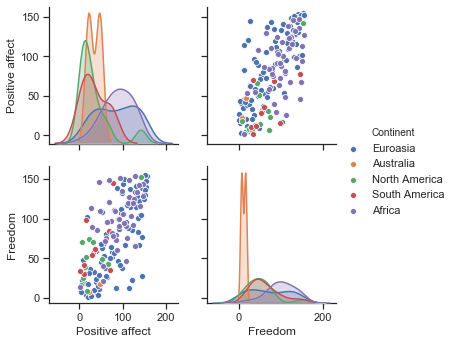

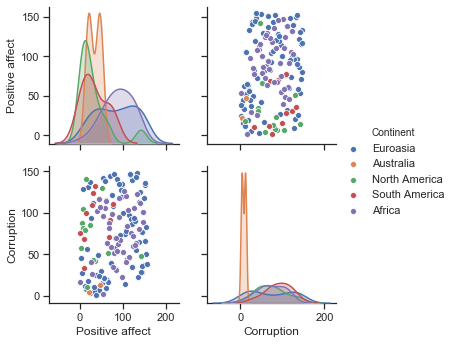

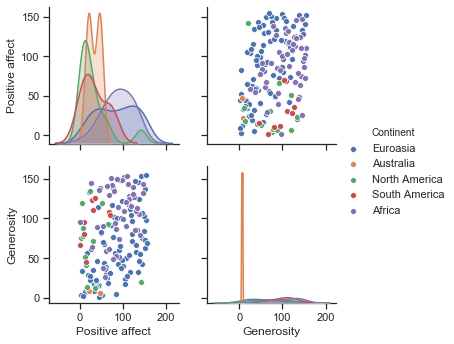

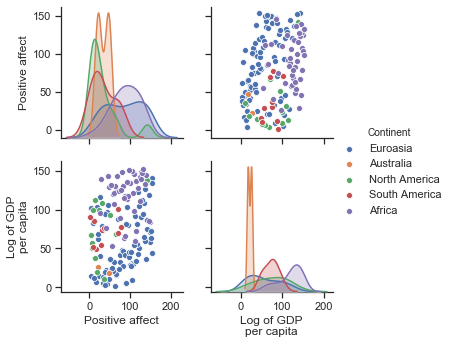

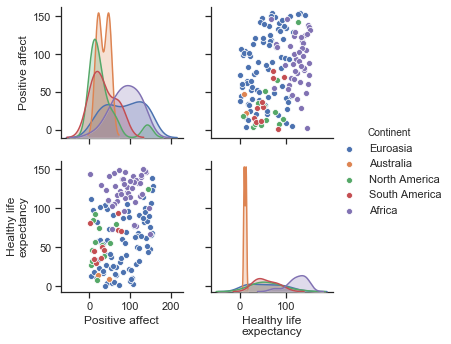

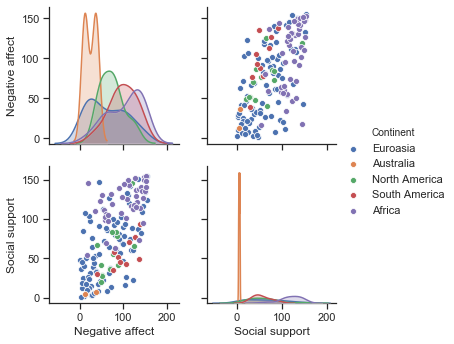

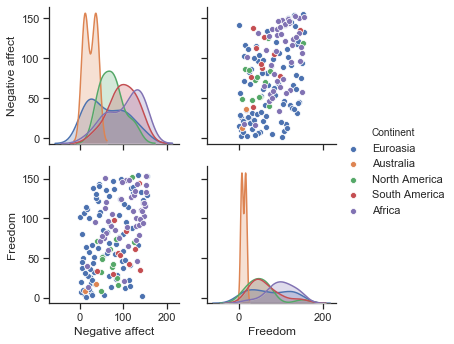

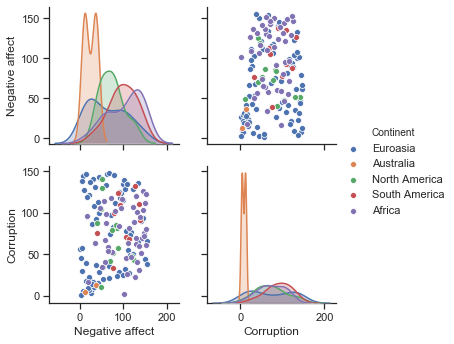

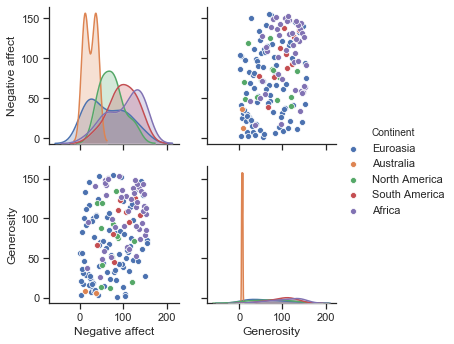

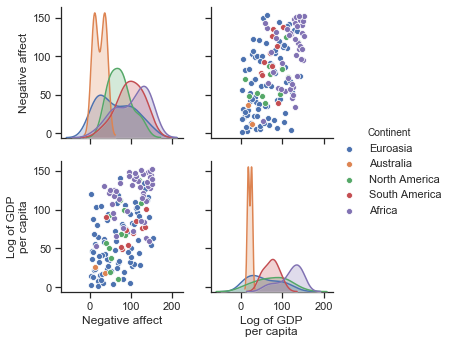

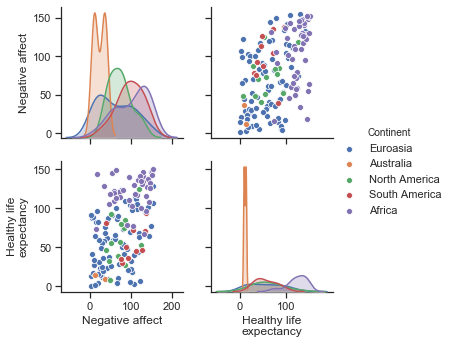

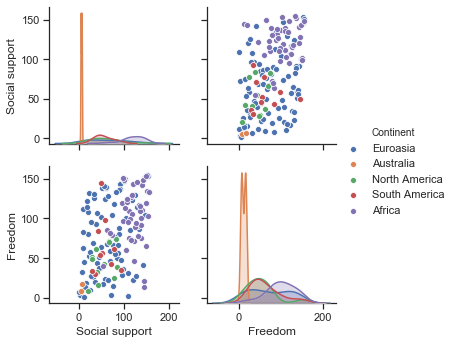

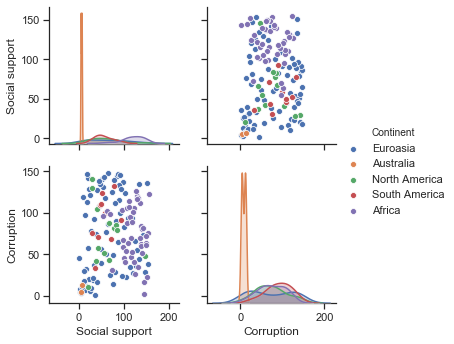

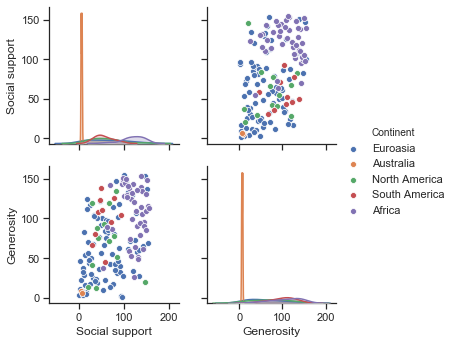

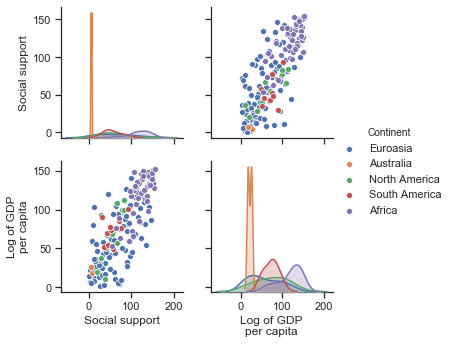

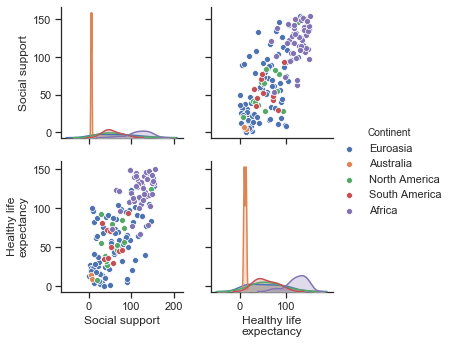

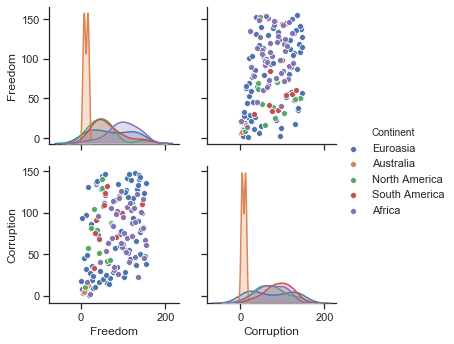

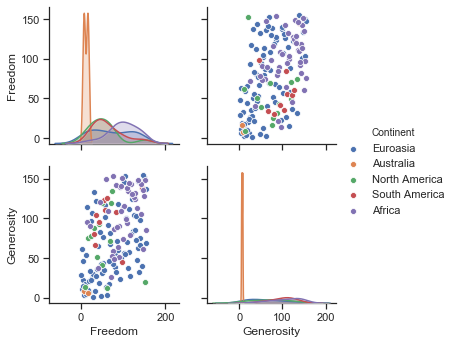

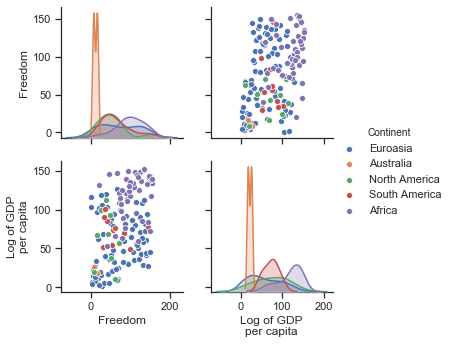

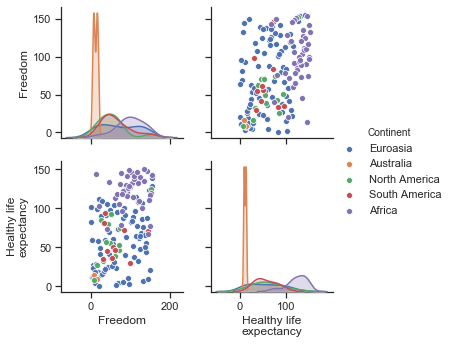

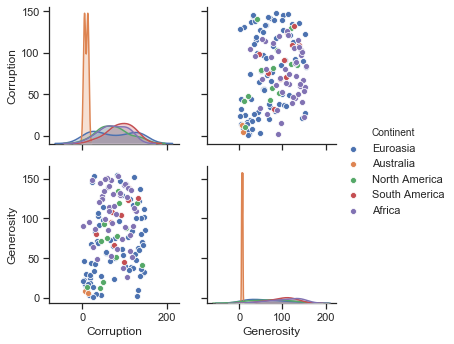

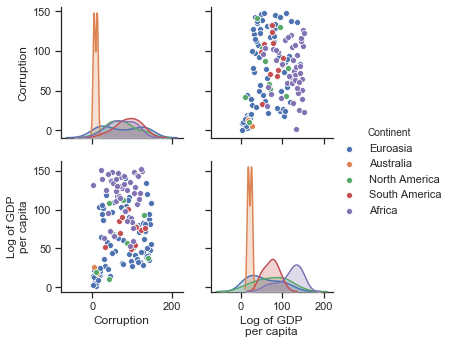

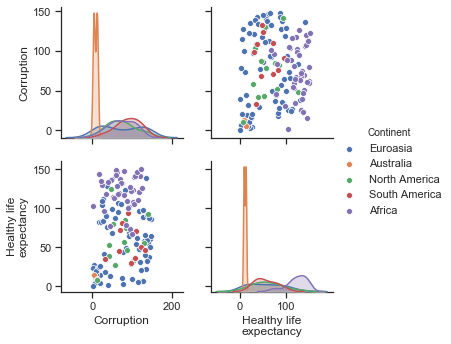

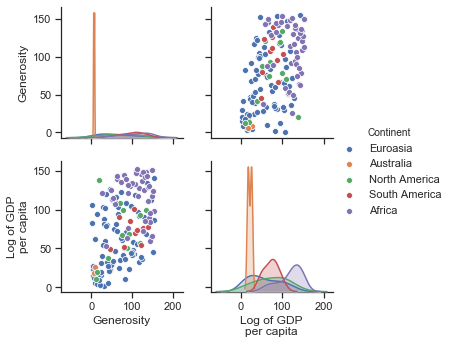

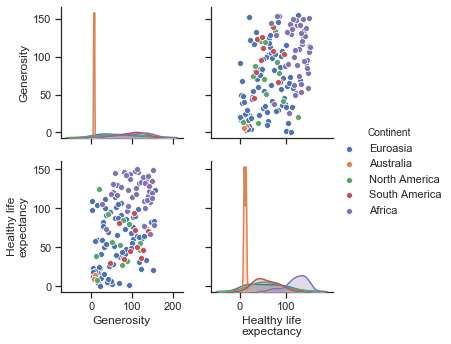

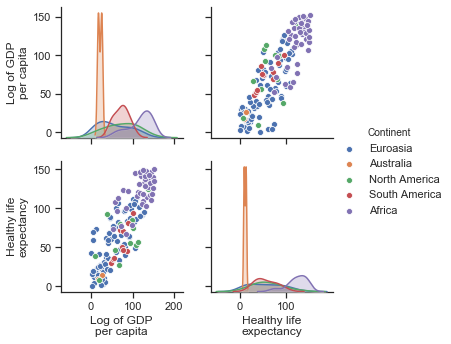

In [22]:
from itertools import combinations
variables_count = 2
for columns_names in combinations(data.iloc[:,1:-1].columns, variables_count):
#     print(columns_names)
    sns.pairplot(data, vars=list(columns_names), hue="Continent")

Больше всего между собой похожи Южная и Севернае америки.

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

*Дубль из первого дз?*

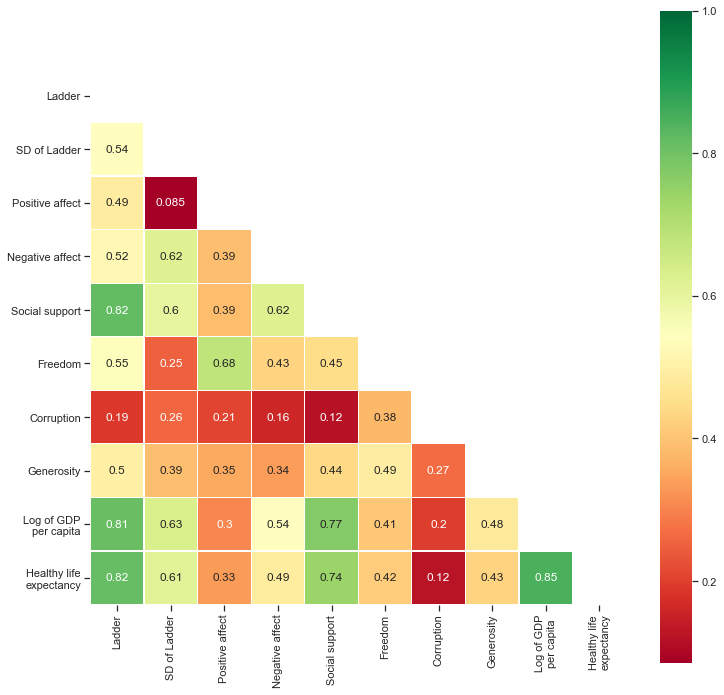

In [117]:
plt.figure(figsize = (12,12))

corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

In [118]:
strong_corr = corr                              \
                .mask(mask)                     \
                .mask(abs(corr)<=0.6)           \
                .unstack()                      \
                .sort_values()                  \
                .sort_values(ascending = False) \
                .dropna()

mid_corr = corr \
                .mask(mask)                     \
                .mask(abs(corr)<=0.3)           \
                .mask(abs(corr)>0.6)            \
                .unstack()                      \
                .sort_values()                  \
                .sort_values(ascending = False) \
                .dropna()

corr_dict = ({
            "Сильные корреляции (0.6 <= x < 1)"  : strong_corr,
            "Средние корреляции (0.3 < x < 0.6):": mid_corr
            })

for corr_lvl, corr_data in corr_dict.items():
    print(corr_lvl)
    for key, value in corr_data.items():
        param1 = "|" + key[0].replace('\n',' ') + "|" 
        param2 = "|" + key[1].replace('\n',' ') + "|" 
        print(f"{param1} to {param2}: {value:1.3f}")
    print() 

Сильные корреляции (0.6 <= x < 1)
|Log of GDP per capita| to |Healthy life expectancy|: 0.848
|Ladder| to |Social support|: 0.818
|Ladder| to |Healthy life expectancy|: 0.817
|Ladder| to |Log of GDP per capita|: 0.813
|Social support| to |Log of GDP per capita|: 0.773
|Social support| to |Healthy life expectancy|: 0.741
|Positive affect| to |Freedom|: 0.682
|SD of Ladder| to |Log of GDP per capita|: 0.630
|Negative affect| to |Social support|: 0.622
|SD of Ladder| to |Negative affect|: 0.619
|SD of Ladder| to |Healthy life expectancy|: 0.611

Средние корреляции (0.3 < x < 0.6):
|SD of Ladder| to |Social support|: 0.599
|Ladder| to |Freedom|: 0.547
|Negative affect| to |Log of GDP per capita|: 0.542
|Ladder| to |SD of Ladder|: 0.539
|Ladder| to |Negative affect|: 0.524
|Ladder| to |Generosity|: 0.498
|Ladder| to |Positive affect|: 0.491
|Freedom| to |Generosity|: 0.490
|Negative affect| to |Healthy life expectancy|: 0.489
|Generosity| to |Log of GDP per capita|: 0.479
|Social support| t

*Хорошее зравоохранение, соц. поддержка и ВВП на душу населения сильно влияют на удовлетворенность положением.
На уровень здравоохреннения оказывают положительное влияние соц. поддержка и ВВП на душу населения (чем богаче страна, тем лучше здравоохранение?)(т.к корреляции не имеют причинно-следственной связи, возможно и обратное).*

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

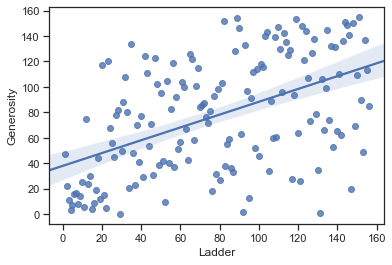

In [119]:
data["Ladder"].fillna(0, inplace = True)
data["Generosity"].fillna(0, inplace = True)
sns.regplot(x=data["Ladder"], y=data["Generosity"], data=data, fit_reg=True)
plt.show()


Собственное значение:  3068.35 Собственный вектор:  [0.70710678 0.70710678]


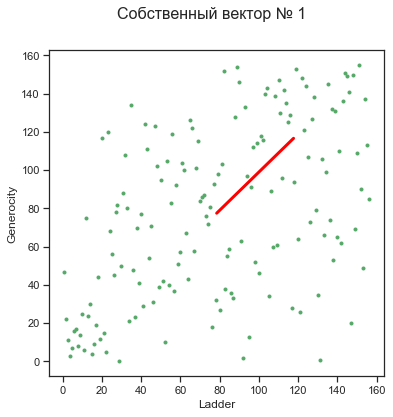

Собственное значение:  1013.65 Собственный вектор:  [-0.70710678  0.70710678]


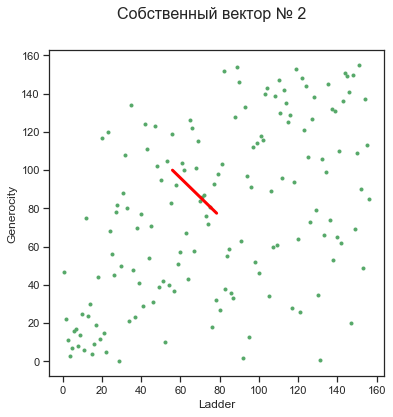

In [121]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

Y = np.vstack((data["Ladder"], data["Generosity"])).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(data["Ladder"], data["Generosity"], 'g.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generocity')
    plt.plot([data["Ladder"].mean(), data["Ladder"].mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [data["Generosity"].mean(), data["Generosity"].mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)
    plt.show()
# Извините, но я вообще не понимаю что тут делается...

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

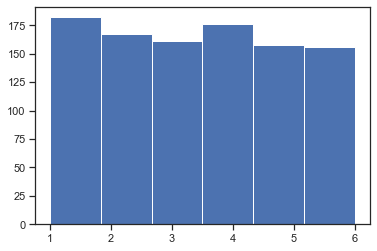

In [80]:
import random
def dice():
    return(random.randint(1,6))

plt.hist([dice() for _ in range(0,1000)], bins=6)
plt.show()

*Распределение - равномерное*

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

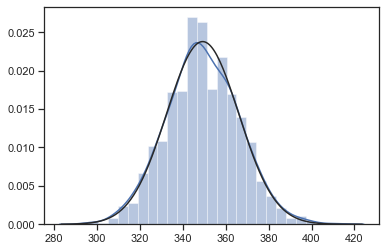

In [85]:
series = [sum([x for x in [dice() for _ in range(0,100)]]) for _ in range(0,1000)]
# plt.hist(series, bins=20)
# plt.show()

from scipy.stats import norm
sns.distplot(a=series, fit=norm)
plt.show()

Распределение - нормальное. Так происходит потому что [сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0)  
В эмуляции мы считали сумму выпавших значений броска - это полностью случайная величина (серия из 10 случайных чисел). Следовательно, несвязанные случайные величины будут стремиться к нормальному распределению.